## Algo Implementation

In [1]:
# https://www.geeksforgeeks.org/quick-sort/
def quick_sort(arr):
    if len(arr) < 2:
        return arr

    # Naive pivot selection
    pivot = arr[0]
    less_arr = [x for x in arr[1:] if x <= pivot]
    greater_arr = [x for x in arr[1:] if x > pivot]

    # Sort the left (smaller elements) and the right (greater elements) side of the pivot
    return quick_sort(less_arr) + [pivot] + quick_sort(greater_arr)

In [2]:
# https://www.geeksforgeeks.org/heap-sort/#
def heap_sort(arr):
    n = len(arr)

    # Build a maxheap
    for i in range(n, -1, -1):
        heapify(arr, n, i)

    # One by one extract elements
    for i in range(n - 1, 0, -1):
        # Since we are using a maxheap, the largest element is at the root, we just need to swap it with the last element
        arr[i], arr[0] = arr[0], arr[i]
        # Heapify the root element again to get the largest element at the root
        heapify(arr, i, 0)

    return arr

def heapify(arr, n, i):
    largest_index = i
    left_tree_index = 2 * i + 1
    right_tree_index = 2 * i + 2

    if left_tree_index < n and arr[i] < arr[left_tree_index]:
        largest_index = left_tree_index

    if right_tree_index < n and arr[largest_index] < arr[right_tree_index]:
        largest_index = right_tree_index

    if largest_index != i:
        arr[i], arr[largest_index] = arr[largest_index], arr[i]
        heapify(arr, n, largest_index)


In [3]:
# https://www.geeksforgeeks.org/merge-sort/
def merge_sort(arr):
    if len(arr) < 2:
        return arr

    mid_index = len(arr) // 2
    left_arr = arr[:mid_index]
    right_arr = arr[mid_index:]

    return merge(merge_sort(left_arr), merge_sort(right_arr))

def merge(left_arr, right_arr):
    result = []

    while len(left_arr) > 0 and len(right_arr) > 0:
        if left_arr[0] < right_arr[0]:
            result.append(left_arr[0])
            left_arr = left_arr[1:]
        else:
            result.append(right_arr[0])
            right_arr = right_arr[1:]

    # Append the remaining elements
    result += left_arr
    result += right_arr

    return result

In [4]:
# https://www.geeksforgeeks.org/radix-sort/
def radix_sort(arr):
    if len(arr) < 2:
        return arr

    max_num = max(arr)

    # `exp` is 10^i where i is current digit number
    exp = 1
    while max_num // exp > 0:
        arr = counting_sort(arr, exp)
        exp *= 10

    return arr

# https://www.geeksforgeeks.org/counting-sort/
def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10    # 10 possible digits 0 -> 9

    # Store the count of each element
    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    # Calculate the actual position of this digit in output[]
    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    return output

In [5]:
# https://www.geeksforgeeks.org/bucket-sort-2/
def bucket_sort(arr):
    if len(arr) < 2:
        return arr

    # https://qr.ae/pKm6Pb - To get the index, we need to divide the element by the max element and multiply it by the number of elements
    # to make sure we don't get an index out of range error
    n = len(arr)
    buckets = [[] for _ in range(n)]
    max_num = max(arr)

    for i in range(n):
        index = n * arr[i] // (max_num + 1)
        buckets[index].append(arr[i])

    # Sort individual buckets
    for i in range(n):
        buckets[i] = quick_sort(buckets[i])

    # Concatenate all buckets into arr[]
    k = 0
    for i in range(n):
        for j in range(len(buckets[i])):
            arr[k] = buckets[i][j]
            k += 1

    return arr

In [6]:
# https://www.baeldung.com/cs/timsort
def tim_sort(arr):
    if len(arr) < 2:
        return arr

    # Divide the array into blocks of size RUN
    RUN = 32
    n = len(arr)
    for i in range(0, n, RUN):
        insertion_sort(arr, i, min(i + RUN - 1, n - 1))

    # Start merging from size RUN. The size will be double each iteration
    size = RUN
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min(left + size - 1, n - 1)
            right = min(left + 2 * size - 1, n - 1)

            merge_tim_sort(arr, left, mid, right)

        size = 2 * size

    return arr

def insertion_sort(arr, left, right):
    for i in range(left + 1, right + 1):
        temp = arr[i]
        j = i - 1
        while j >= left and arr[j] > temp:
            arr[j + 1] = arr[j]
            j -= 1

        arr[j + 1] = temp

def merge_tim_sort(arr, l, m, r):
    len1 = m - l + 1
    len2 = r - m
    left = []
    right = []

    for i in range(0, len1):
        left.append(arr[l + i])
    for i in range(0, len2):
        right.append(arr[m + 1 + i])

    i = 0
    j = 0
    k = l

    # After comparing, we merge those two array
    # in larger sub array
    while i < len1 and j < len2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1

        k += 1

    # Copy remaining elements of left, if any
    while i < len1:
        arr[k] = left[i]
        k += 1
        i += 1

    # Copy remaining element of right, if any
    while j < len2:
        arr[k] = right[j]
        k += 1
        j += 1

## Input generators

In [7]:
import random
import math

def generate_input(n, k_list):
    return {
        "random_n": get_random_n(n),
        "random_n_in_range_list": [get_random_n_in_range(n, k) for k in k_list],
        "random_n_in_cube": get_random_n_in_cube(n),
        "random_n_in_log": get_random_n_in_log(n),
        "random_n_where_multiples": get_random_n_where_multiples(n),
        "in_order_but_swapped_integers": get_in_order_but_swapped_integers(n)
    }


# n random chosen integers in the range [0...n]
def get_random_n(n):
    random_integers = random.sample(range(n + 1), n)
    return random_integers

# n randomly chosen integers in the range [0...k], k < 1000
def get_random_n_in_range(n, k):
    random_integers = random.choices(range(min(k, 999) + 1), k=n)
    return random_integers

# n randomly chosen integers in the range [0...n^3]
def get_random_n_in_cube(n):
    random_integers = random.sample(range(n**3 + 1), n)
    return random_integers

# n randomly chosen integers in the range [0...log(n)]
def get_random_n_in_log(n):
    log_range = int(math.log(n))
    random_integers = random.choices(range(log_range + 1), k=n)
    return random_integers

# n randomly chosen integers that are multiples of 1000 in the range [0...n]
def get_random_n_where_multiples(n):
    multiple_of_1000 = []
    for i in range(0, n + 1, 1000):
        multiple_of_1000.append(i)

    return random.choices(multiple_of_1000, k=n)

# the in order integers [0...n] where log(n)/2 randomly chosen values have been swapped with another value
def get_in_order_but_swapped_integers(n):
    in_order_integers = list(range(n + 1))

    log_range = int(math.log(n))
    # Generate all the indices that will be swapped
    random_indices = random.sample(range(n + 1), int(log_range))

    for i in range(len(random_indices), 2):
        index_1 = random_indices[i]
        index_2 = random_indices[i + 1]
        in_order_integers[index_1], in_order_integers[index_2] = in_order_integers[index_2], in_order_integers[index_1]

    return in_order_integers

## Experimentation

In [8]:
import sys

print(sys.getrecursionlimit())
sys.setrecursionlimit(100000)

def run_sort_suite(arr, suite_name, runner):
    print("*** Running {} suite ***".format(suite_name))
    quick_sort_result = runner(quick_sort, arr.copy(), "Quick Sort")
    heap_sort_result = runner(heap_sort, arr.copy(), "Heap Sort")
    merge_sort_result = runner(merge_sort, arr.copy(), "Merge Sort")
    radix_sort_result = runner(radix_sort, arr.copy(), "Radix Sort")
    bucket_sort_result = runner(bucket_sort, arr.copy(), "Bucket Sort")
    tim_sort_result = runner(tim_sort, arr.copy(), "Tim Sort")
    print("\n")

    return {
        "quick_sort": quick_sort_result,
        "heap_sort": heap_sort_result,
        "merge_sort": merge_sort_result,
        "radix_sort": radix_sort_result,
        "bucket_sort": bucket_sort_result,
        "tim_sort": tim_sort_result
    }

3000


In [9]:
import time

n_list = [1000, 5000, 7000, 9000, 10000, 12500, 15000, 17500, 20000, 25000, 50000]
k_list = [10, 100, 1000]

'''
run_time_map = {
  <input_name>: {
    "n": <n>,
    "k"?: <k>,
    <sorter_name>: <run_time>
  }[]
'''
run_time_map = {
  "random_n": [],
  "random_n_in_range_list": [],
  "random_n_in_cube": [],
  "random_n_in_log": [],
  "random_n_where_multiples": [],
  "in_order_but_swapped_integers": []
}

def run_all_sorts():
    for n in n_list:
      print("!!! Running for n = {} !!!".format(n))

      my_input = generate_input(n, k_list)
      random_n_result = run_sort_suite(my_input["random_n"], "Random n", run_sort)
      run_time_map["random_n"].append({ "n": n, **random_n_result })

      for i in range(len(my_input["random_n_in_range_list"])):
        my_k_list = my_input["random_n_in_range_list"][i]
        print("!!! Running for n = {} and k = {} !!!".format(n, k_list[i]))

        run_sort_suite(my_k_list, "Random n in range list", run_sort)
        run_time_map["random_n_in_range_list"].append({ "n": n, "k": k_list[i], **random_n_result })

      random_n_in_cube_result = run_sort_suite(my_input["random_n_in_cube"], "Random n in cube", run_sort)
      run_time_map["random_n_in_cube"].append({ "n": n, **random_n_in_cube_result })

      random_n_in_log_result = run_sort_suite(my_input["random_n_in_log"], "Random n in log", run_sort)
      run_time_map["random_n_in_log"].append({ "n": n, **random_n_in_log_result })

      random_n_where_multiples_result = run_sort_suite(my_input["random_n_where_multiples"], "Random n where multiples", run_sort)
      run_time_map["random_n_where_multiples"].append({ "n": n, **random_n_where_multiples_result })

      in_order_but_swapped_integers_result = run_sort_suite(my_input["in_order_but_swapped_integers"], "In order but swapped integers", run_sort)
      run_time_map["in_order_but_swapped_integers"].append({ "n": n, **in_order_but_swapped_integers_result })

def run_sort(sorter, arr, sorter_name):
    print("--- Experimenting {} ---".format(sorter_name))
    start_time = time.time()
    sorter(arr)
    end_time = time.time()
    print("{} sorted successfully!".format(sorter_name))

    total_time = end_time - start_time
    print("Time taken for {}: {} seconds".format(sorter_name, total_time))
    return total_time

In [10]:
run_all_sorts()

!!! Running for n = 1000 !!!
*** Running Random n suite ***
--- Experimenting Quick Sort ---
Quick Sort sorted successfully!
Time taken for Quick Sort: 0.0040166378021240234 seconds
--- Experimenting Heap Sort ---
Heap Sort sorted successfully!
Time taken for Heap Sort: 0.0059986114501953125 seconds
--- Experimenting Merge Sort ---
Merge Sort sorted successfully!
Time taken for Merge Sort: 0.007012367248535156 seconds
--- Experimenting Radix Sort ---
Radix Sort sorted successfully!
Time taken for Radix Sort: 0.0030014514923095703 seconds
--- Experimenting Bucket Sort ---
Bucket Sort sorted successfully!
Time taken for Bucket Sort: 0.0015091896057128906 seconds
--- Experimenting Tim Sort ---
Tim Sort sorted successfully!
Time taken for Tim Sort: 0.004502534866333008 seconds


!!! Running for n = 1000 and k = 10 !!!
*** Running Random n in range list suite ***
--- Experimenting Quick Sort ---
Quick Sort sorted successfully!
Time taken for Quick Sort: 0.009508371353149414 seconds
--- Expe

Bucket Sort sorted successfully!
Time taken for Bucket Sort: 0.014578819274902344 seconds
--- Experimenting Tim Sort ---
Tim Sort sorted successfully!
Time taken for Tim Sort: 0.0034987926483154297 seconds


*** Running Random n where multiples suite ***
--- Experimenting Quick Sort ---
Quick Sort sorted successfully!
Time taken for Quick Sort: 0.04356861114501953 seconds
--- Experimenting Heap Sort ---
Heap Sort sorted successfully!
Time taken for Heap Sort: 0.0035004615783691406 seconds
--- Experimenting Merge Sort ---
Merge Sort sorted successfully!
Time taken for Merge Sort: 0.005507469177246094 seconds
--- Experimenting Radix Sort ---
Radix Sort sorted successfully!
Time taken for Radix Sort: 0.003504514694213867 seconds
--- Experimenting Bucket Sort ---
Bucket Sort sorted successfully!
Time taken for Bucket Sort: 0.04305315017700195 seconds
--- Experimenting Tim Sort ---
Tim Sort sorted successfully!
Time taken for Tim Sort: 0.0035076141357421875 seconds


*** Running In order bu

## Scheming...

In [11]:
def index_to_sort_name(index):
    if index == 0:
        return "quick_sort"
    elif index == 1:
        return "heap_sort"
    elif index == 2:
        return "merge_sort"
    elif index == 3:
        return "radix_sort"
    elif index == 4:
        return "bucket_sort"
    elif index == 5:
        return "tim_sort"

def index_to_input_name(index):
    if index == 0:
        return "random_n"
    elif index == 1:
        return "random_n_in_range_list"
    elif index == 2:
        return "random_n_in_cube"
    elif index == 3:
        return "random_n_in_log"
    elif index == 4:
        return "random_n_where_multiples"
    elif index == 5:
        return "in_order_but_swapped_integers"

def input_name_to_index(input_name):
    if input_name == "random_n":
        return 0
    elif input_name == "random_n_in_range_list":
        return 1
    elif input_name == "random_n_in_cube":
        return 2
    elif input_name == "random_n_in_log":
        return 3
    elif input_name == "random_n_where_multiples":
        return 4
    elif input_name == "in_order_but_swapped_integers":
        return 5

In [12]:
def extract_data_for_input_type(run_time_map, input_type, ignore_sorters = []):
    data = run_time_map[input_type]
    x = []
    # y should be the 2d list of run time for all sorters
    y = [[], [], [], [], [], []]
    labels = ["Quick Sort", "Heap sort", "Merge Sort", "Radix Sort", "Bucket Sort", "Tim Sort"]
    for i in range(len(data)):
        x.append(data[i]["n"])
        for j in range(len(y)):
            if j not in ignore_sorters:
                y[j].append(data[i][index_to_sort_name(j)])

    # Remove the empty lists
    y = [y[i] for i in range(len(y)) if i not in ignore_sorters]
    labels = [labels[i] for i in range(len(labels)) if i not in ignore_sorters]

    return x, y, labels

def extract_data_for_sorter(run_time_map, sorter_name):
    all_sort_data = run_time_map.items()

    x = []
    # 2d array of run time data for each input_type
    y = [[] for _ in range(len(all_sort_data))]

    labels = ["Random n", "Random n in range list", "Random n in cube", "Random n in log", "Random n where multiples", "In order but swapped integers"]

    for input_type, run_time_list in all_sort_data:
        input_type_index = input_name_to_index(input_type)

        # Map of runtime with <n> as key - we do this to handle the case where there are multiple `k` values for the same `n`
        input_type_run_time_map = {}
        for run_time in run_time_list:
            n = run_time["n"]
            x.append(n)

            if n in input_type_run_time_map:
                input_type_run_time_map[n].append(run_time[sorter_name])
            else:
                input_type_run_time_map[n] = [run_time[sorter_name]]

        for n, run_time_list in input_type_run_time_map.items():
            y[input_type_index].append(sum(run_time_list) / len(run_time_list))

    x = list(set(x))
    x.sort()

    return x, y, labels

In [13]:
# Plot graph based on the run time map and extract_data_for_input_type
import matplotlib.pyplot as plt

def plot_graph(x, y, labels, input_type):
    for i in range(len(y)):
        plt.plot(x, y[i], label=labels[i])

    plt.xlabel("n")
    plt.ylabel("Run Time (s)")
    plt.title("Run Time of Sorters for {} input type".format(input_type))
    plt.legend()
    plt.show()

In [14]:
def generate_graph_for_all_sorters(ignore_sorters = []):
    for i in range(len(run_time_map)):
        input_type = index_to_input_name(i)
        x, y, labels = extract_data_for_input_type(run_time_map, input_type, ignore_sorters)
        plot_graph(x, y, labels, input_type)

def generate_graph_for_all_input_types():
    for i in range(6):
        sorter_name = index_to_sort_name(i)
        x, y, labels = extract_data_for_sorter(run_time_map, sorter_name)
        plot_graph(x, y, labels, sorter_name)

#### All sorters + 1 input type combo --- All graphs

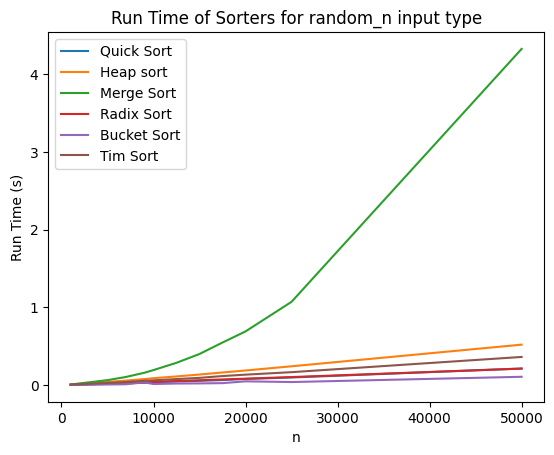

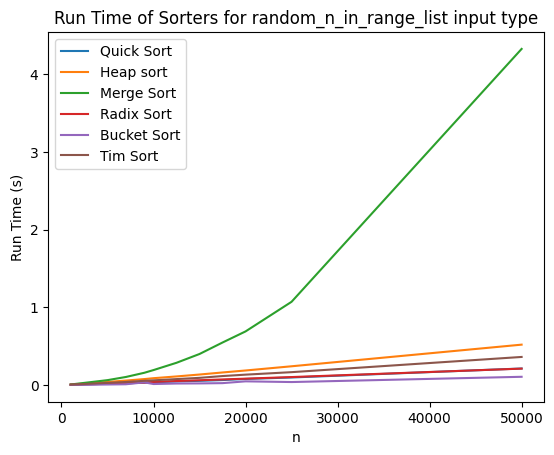

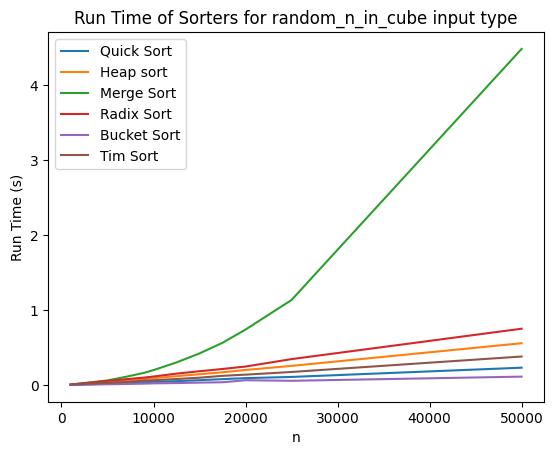

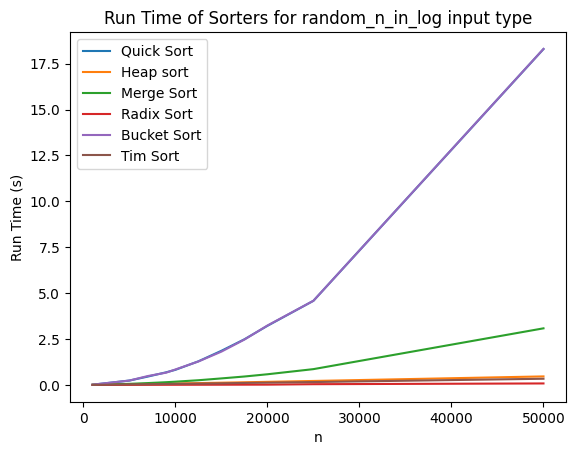

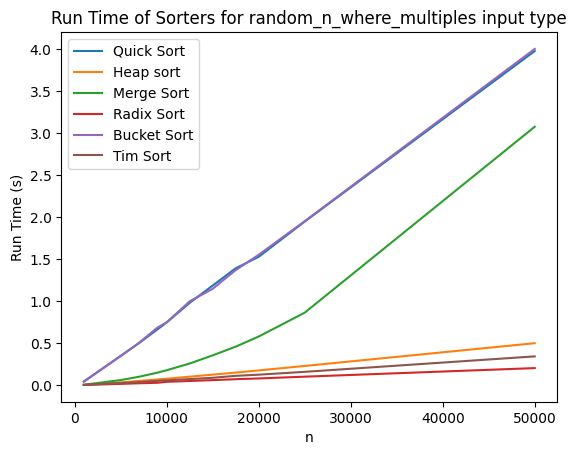

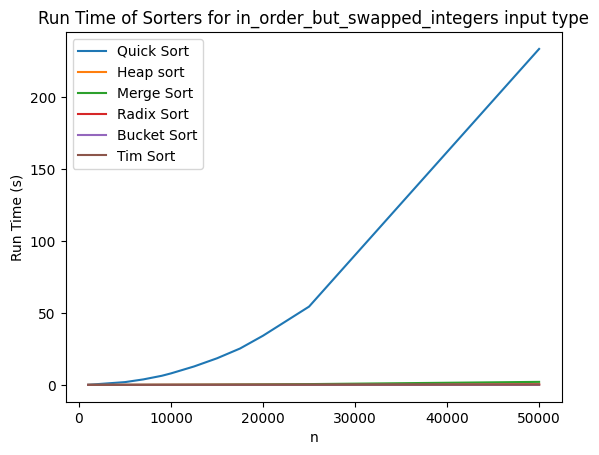

In [15]:
# All graphs
generate_graph_for_all_sorters()

#### All sorters + 1 input type combo --- Graph without mergesort

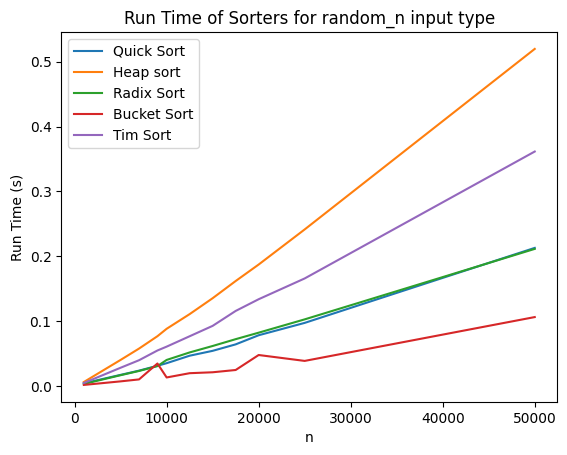

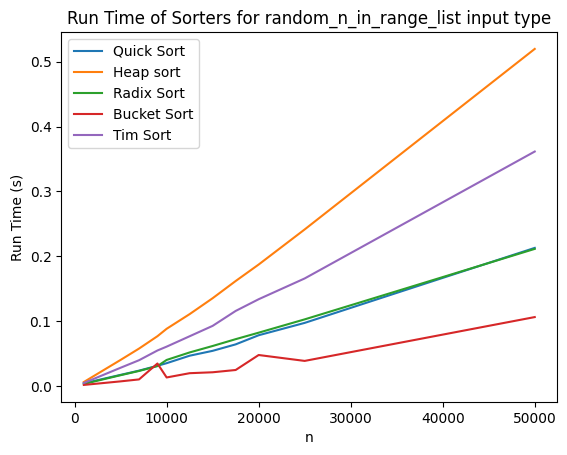

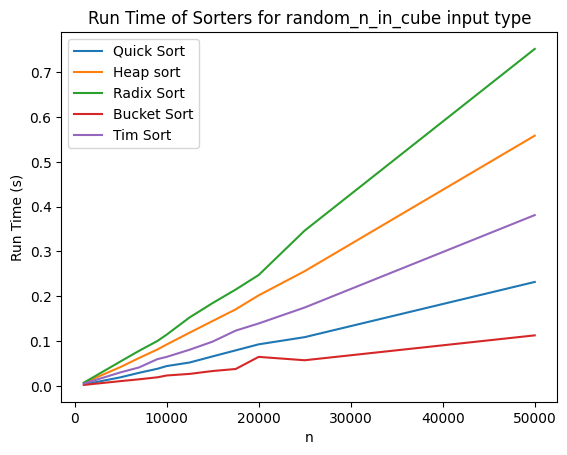

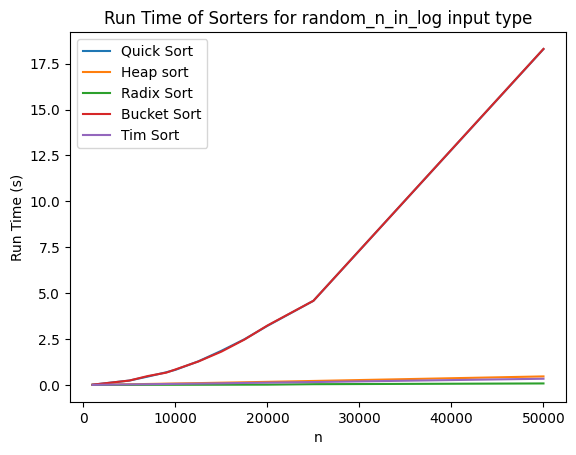

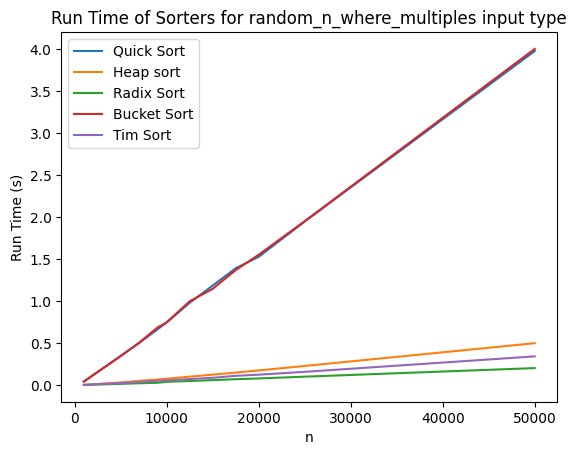

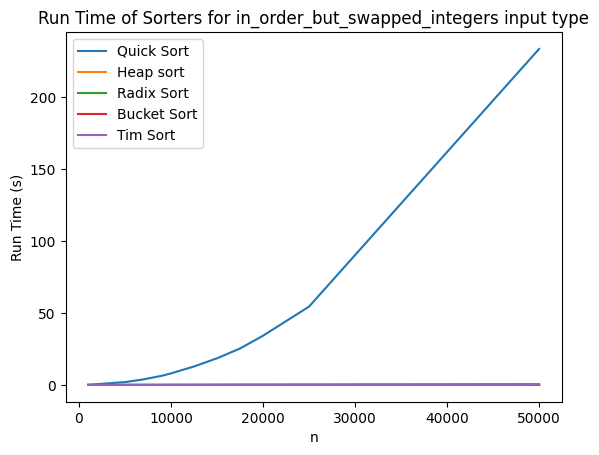

In [16]:
# Graph without merge sort to see the data without being skewed by merge sort
generate_graph_for_all_sorters([2])

### 1 sorter + all input types combo --- All graphs

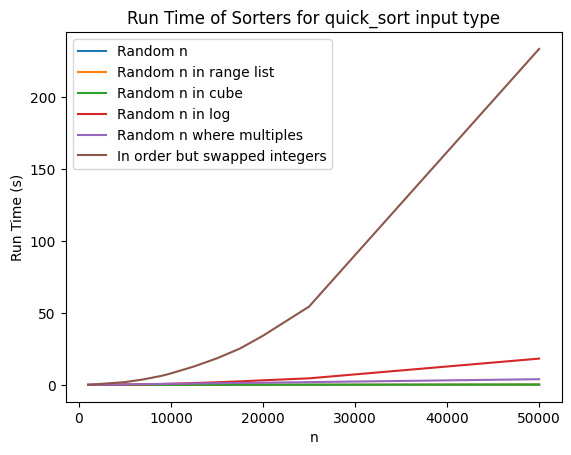

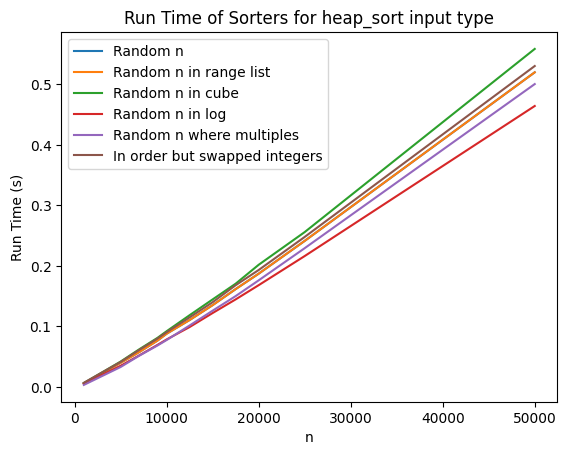

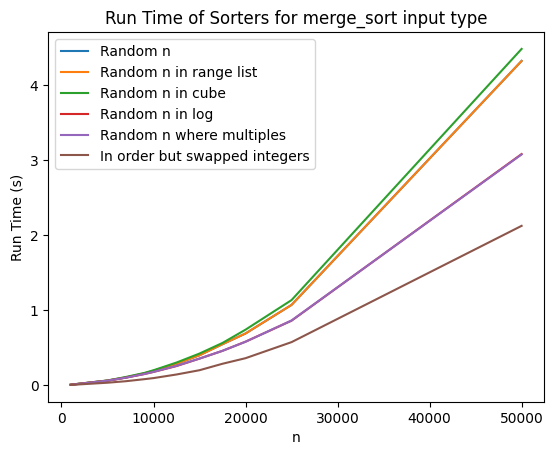

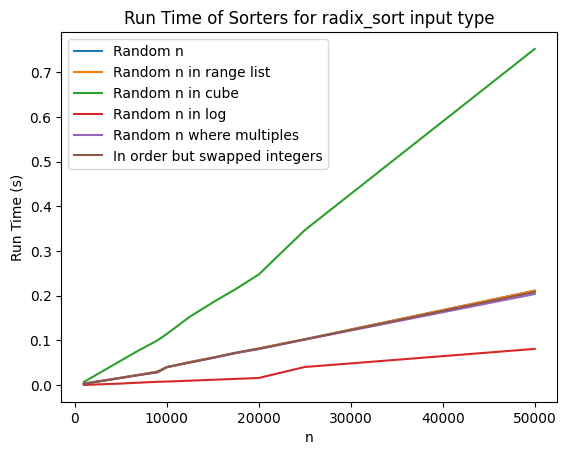

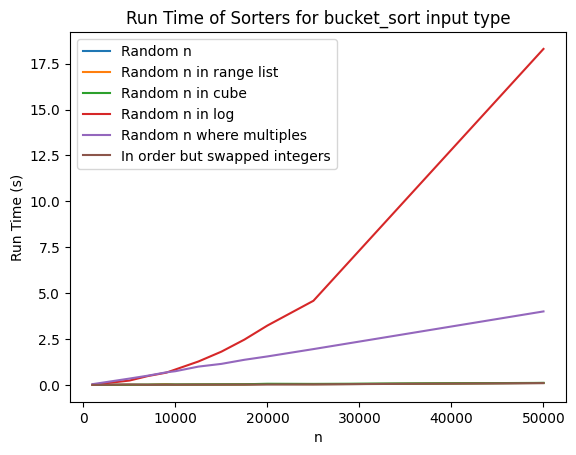

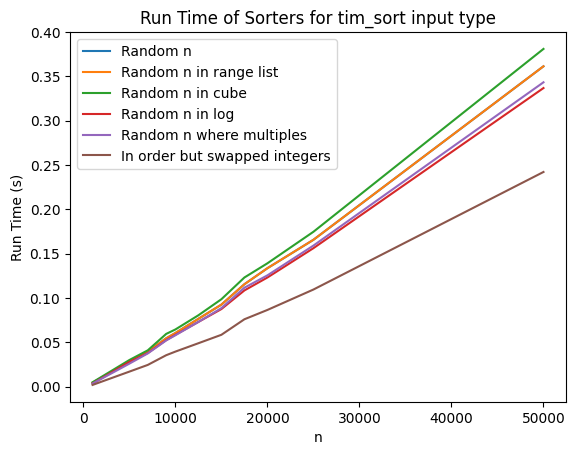

In [17]:
generate_graph_for_all_input_types()

## Extra: Algo Testing

Just to make sure the algos are implemented correctly

In [18]:
import time

def run_test_suite(arr, suite_name):
    run_sort_suite(arr, suite_name, run_test)

def run_test(sorter, arr, sorter_name):
    print("--- Testing {} ---".format(sorter_name))

    start_time = time.time()
    algo_sorted_arr = sorter(arr)
    end_time = time.time()
    print("Time taken for algo: {} seconds".format(end_time - start_time))

    start_time = time.time()
    python_sorted_arr = sorted(arr)
    end_time = time.time()
    print("Time taken standard Python sort: {} seconds".format(end_time - start_time))

    if algo_sorted_arr == python_sorted_arr:
        print("Test passed\n")
    else:
        print("Test failed\n")
        raise Exception("Test failed")

### Small dataset

In [19]:
run_test_suite([1, 2, 3, 4, 5], "Already sorted")
run_test_suite([5, 4, 3, 2, 1], "Reverse sorted")
run_test_suite([1, 3, 2, 5, 4], "Random order")
run_test_suite([1], "Single element")
run_test_suite([], "Empty array")

*** Running Already sorted suite ***
--- Testing Quick Sort ---
Time taken for algo: 0.0 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Heap Sort ---
Time taken for algo: 0.0 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Merge Sort ---
Time taken for algo: 0.0 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Radix Sort ---
Time taken for algo: 0.0 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Bucket Sort ---
Time taken for algo: 0.0 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Tim Sort ---
Time taken for algo: 0.0 seconds
Time taken standard Python sort: 0.0 seconds
Test passed



*** Running Reverse sorted suite ***
--- Testing Quick Sort ---
Time taken for algo: 0.0 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Heap Sort ---
Time taken for algo: 0.0 seconds
Time taken standard Python sort: 0.0 seco

### Large dataset

In [20]:
# Large array
run_test_suite(get_random_n(1000), "1000 elements")

*** Running 1000 elements suite ***
--- Testing Quick Sort ---
Time taken for algo: 0.002998828887939453 seconds
Time taken standard Python sort: 0.0005009174346923828 seconds
Test passed

--- Testing Heap Sort ---
Time taken for algo: 0.006011247634887695 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Merge Sort ---
Time taken for algo: 0.006509065628051758 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Radix Sort ---
Time taken for algo: 0.0029990673065185547 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Bucket Sort ---
Time taken for algo: 0.0029997825622558594 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Tim Sort ---
Time taken for algo: 0.004010677337646484 seconds
Time taken standard Python sort: 0.0 seconds
Test passed





In [21]:
run_test_suite(get_random_n(10000), "10000 elements")

*** Running 10000 elements suite ***
--- Testing Quick Sort ---
Time taken for algo: 0.036554813385009766 seconds
Time taken standard Python sort: 0.0014998912811279297 seconds
Test passed

--- Testing Heap Sort ---
Time taken for algo: 0.08662199974060059 seconds
Time taken standard Python sort: 0.0004999637603759766 seconds
Test passed

--- Testing Merge Sort ---
Time taken for algo: 0.18732643127441406 seconds
Time taken standard Python sort: 0.0010006427764892578 seconds
Test passed

--- Testing Radix Sort ---
Time taken for algo: 0.04206061363220215 seconds
Time taken standard Python sort: 0.0009996891021728516 seconds
Test passed

--- Testing Bucket Sort ---
Time taken for algo: 0.013509511947631836 seconds
Time taken standard Python sort: 0.0 seconds
Test passed

--- Testing Tim Sort ---
Time taken for algo: 0.061081886291503906 seconds
Time taken standard Python sort: 0.0 seconds
Test passed





In [22]:
run_test_suite(get_random_n(25000), "25000 elements")

*** Running 25000 elements suite ***
--- Testing Quick Sort ---
Time taken for algo: 0.09817695617675781 seconds
Time taken standard Python sort: 0.003999948501586914 seconds
Test passed

--- Testing Heap Sort ---
Time taken for algo: 0.24488353729248047 seconds
Time taken standard Python sort: 0.0004999637603759766 seconds
Test passed

--- Testing Merge Sort ---
Time taken for algo: 1.0569186210632324 seconds
Time taken standard Python sort: 0.0040094852447509766 seconds
Test passed

--- Testing Radix Sort ---
Time taken for algo: 0.1066579818725586 seconds
Time taken standard Python sort: 0.004003763198852539 seconds
Test passed

--- Testing Bucket Sort ---
Time taken for algo: 0.03452873229980469 seconds
Time taken standard Python sort: 0.001001596450805664 seconds
Test passed

--- Testing Tim Sort ---
Time taken for algo: 0.16472554206848145 seconds
Time taken standard Python sort: 0.0 seconds
Test passed





In [23]:
run_test_suite(get_random_n(50000), "50000 elements")
run_test_suite([i for i in range(0, 50000, 1)], "50000 elements sorted")
run_test_suite([i for i in range(50000, 0, -1)], "50000 elements reversed")

*** Running 50000 elements suite ***
--- Testing Quick Sort ---
Time taken for algo: 0.20572948455810547 seconds
Time taken standard Python sort: 0.00901341438293457 seconds
Test passed

--- Testing Heap Sort ---
Time taken for algo: 0.5277523994445801 seconds
Time taken standard Python sort: 0.0005006790161132812 seconds
Test passed

--- Testing Merge Sort ---
Time taken for algo: 4.189599990844727 seconds
Time taken standard Python sort: 0.008510112762451172 seconds
Test passed

--- Testing Radix Sort ---
Time taken for algo: 0.21884846687316895 seconds
Time taken standard Python sort: 0.008511781692504883 seconds
Test passed

--- Testing Bucket Sort ---
Time taken for algo: 0.12223529815673828 seconds
Time taken standard Python sort: 0.0009999275207519531 seconds
Test passed

--- Testing Tim Sort ---
Time taken for algo: 0.36348533630371094 seconds
Time taken standard Python sort: 0.0005011558532714844 seconds
Test passed



*** Running 50000 elements sorted suite ***
--- Testing Qu

### Some dummy stuff

In [24]:
# [(y["n"], y["quick_sort"]) for y in run_time_map["in_order_but_swapped_integers"]]
# [(y["n"], y["heap_sort"]) for y in run_time_map["in_order_but_swapped_integers"]]

In [25]:
run_time_map

{'random_n': [{'n': 1000,
   'quick_sort': 0.0040166378021240234,
   'heap_sort': 0.0059986114501953125,
   'merge_sort': 0.007012367248535156,
   'radix_sort': 0.0030014514923095703,
   'bucket_sort': 0.0015091896057128906,
   'tim_sort': 0.004502534866333008},
  {'n': 5000,
   'quick_sort': 0.017025470733642578,
   'heap_sort': 0.04011130332946777,
   'merge_sort': 0.06308245658874512,
   'radix_sort': 0.01652073860168457,
   'bucket_sort': 0.007005453109741211,
   'tim_sort': 0.028024673461914062},
  {'n': 7000,
   'quick_sort': 0.02352619171142578,
   'heap_sort': 0.05756807327270508,
   'merge_sort': 0.10380887985229492,
   'radix_sort': 0.023031949996948242,
   'bucket_sort': 0.010009527206420898,
   'tim_sort': 0.039595842361450195},
  {'n': 9000,
   'quick_sort': 0.031038522720336914,
   'heap_sort': 0.07666182518005371,
   'merge_sort': 0.15778279304504395,
   'radix_sort': 0.030530691146850586,
   'bucket_sort': 0.0345606803894043,
   'tim_sort': 0.05461287498474121},
  {'n':